# 02_Modelling.ipynb – Classification de la qualité de l'eau

## 1. Importation des bibliothèques

In [1]:
#Importation des bibliothèques
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Chargement des données nettoyées

In [8]:
# Charger les données nettoyées
df = pd.read_csv("../data/processed/water_potability_clean.csv")

# Séparer les variables explicatives (X) et la cible (y)
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Diviser le jeu de données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Entraînement du modèle Random Forest

In [23]:
# Créer et entraîner le modèle
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

## 4. Évaluation du modèle

In [26]:
# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

Rapport de classification :
              precision    recall  f1-score   support

         0.0       0.68      0.88      0.77       412
         1.0       0.60      0.32      0.41       244

    accuracy                           0.67       656
   macro avg       0.64      0.60      0.59       656
weighted avg       0.65      0.67      0.64       656



## 5. Matrice de confusion

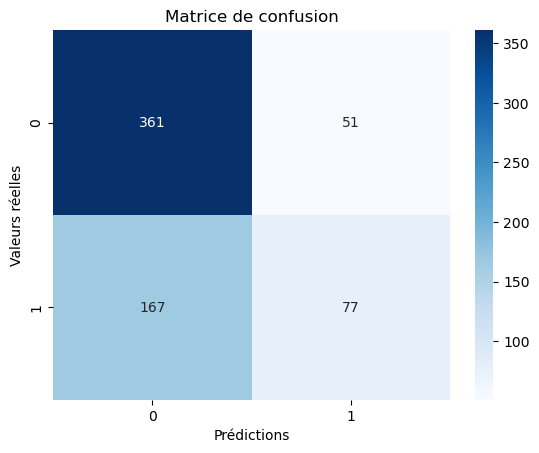

In [29]:
# Matrice de confusion visuelle
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()

In [31]:
importances = model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)
print(feat_df)

           Feature  Importance
0               ph    0.126573
1         Hardness    0.119433
4          Sulfate    0.118845
2           Solids    0.116534
3      Chloramines    0.113808
6   Organic_carbon    0.104959
5     Conductivity    0.100986
7  Trihalomethanes    0.099957
8        Turbidity    0.098906


In [33]:
import joblib

In [35]:
# Enregistrer le modèle entraîné
joblib.dump(model, "../models/random_forest_model.pkl")

print("✅ Le modèle a été sauvegardé avec succès.")

✅ Le modèle a été sauvegardé avec succès.


In [37]:
# Recharger le modèle depuis le fichier
## model_loaded = joblib.load("../models/random_forest_model.pkl") ##

In [39]:
import pandas as pd

df = pd.read_csv("../data/processed/ireland_clean_labeled.csv")
df.head()

,pH,Temperature,Conductivity @25°C,Dissolved Oxygen,BOD - 5 days (Total),Ammonia-Total (as N),ortho-Phosphate (as P) - unspecified,Total Hardness (as CaCO3),True Colour,Is_Potable_By_Normes
0,7.80,10.4,711.0,52.50,1.2,0.033,0.019,370.0,24.0,0
1,7.42,17.8,71.0,61.85,1.2,0.033,0.019,13.4,35.0,0
2,7.67,18.1,79.0,61.80,1.2,0.033,0.019,15.8,29.0,0
3,7.63,17.8,78.0,62.40,1.2,0.033,0.019,15.9,31.0,0
4,7.33,20.1,76.0,66.05,1.2,0.033,0.019,15.4,23.0,0


In [43]:
X = df.drop("Is_Potable_By_Normes", axis=1)
y = df["Is_Potable_By_Normes"]

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [47]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 5.7 MB/s eta 0:00:27
   ---------------------------------------- 1.3/150.0 MB 4.2 MB/s eta 0:00:36
    --------------------------------------- 2.1/150.0 MB 4.2 MB/s eta 0:00:36
    --------------------------------------- 2.9/150.0 MB 3.9 MB/s eta 0:00:38
    --------------------------------------- 3.4/150.0 MB 3.8 MB/s eta 0:00:39
   - -------------------------------------- 4.2/150.0 MB 3.8 MB/s eta 0:00:39
   - -------------------------------------- 5.0/150.0 MB 3.7 MB/s eta 0:00:40
   - -------------------------------------- 5.8/150.0 MB 3.7 MB/s eta 0:00:39
   - -------------------------------------- 6.6/150.0 MB 3.7 MB/s eta 0:00:39
   - -------------------------------------- 7.3/150.0 MB 3.7 MB/s eta 0:00:39
   -- ------------------------------------- 8.1/150.0 MB 3.7 MB/s eta 0:00:39
   -- ------------------------------------- 8.9/150.0 MB 3.7 MB/s eta 0

In [54]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)

C:\Users\medmo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:19:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5463    0]
 [   0  369]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5463
           1       1.00      1.00      1.00       369

    accuracy                           1.00      5832
   macro avg       1.00      1.00      1.00      5832
weighted avg       1.00      1.00      1.00      5832



In [56]:
import joblib

joblib.dump(model, "../models/xgboost_by_normes.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

['../models/scaler.pkl']

In [63]:
import pandas as pd

# تحميل الملف - غيّر المسار إذا كان مختلفًا
df = pd.read_csv("../data/processed/ireland_clean_labeled.csv")

# عرض عدد القيم لكل فئة في عمود Is_Potable_By_Normes
counts = df["Is_Potable_By_Normes"].value_counts()

# طباعة النتائج
print("🔍 توزيع البيانات حسب معيار الصلاحية:")
print(f"✅ صالحة للشرب: {counts.get(1, 0)}")
print(f"❌ غير صالحة للشرب: {counts.get(0, 0)}")

🔍 توزيع البيانات حسب معيار الصلاحية:
✅ صالحة للشرب: 1847
❌ غير صالحة للشرب: 27312
